In [1]:
import pandas as pd
data=pd.read_csv("/content/Ice_cream selling data.csv")
data.head(4)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845


In [2]:
data.isnull().sum()

,0
Temperature (°C),0
Ice Cream Sales (units),0


In [8]:
x=data[["Temperature (°C)"]]
y=data['Ice Cream Sales (units)']

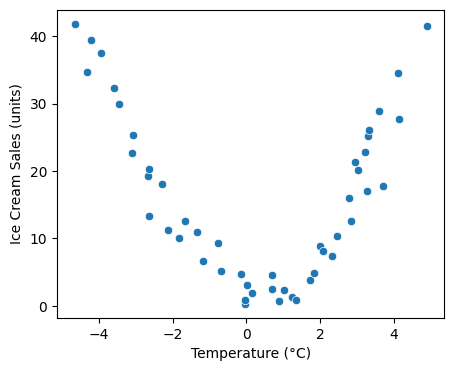

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="Temperature (°C)",y="Ice Cream Sales (units)")
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr.fit(x)
x=pr.transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x)
y_pred

array([46.74097975, 40.68776903, 38.97775503, 34.7527302 , 29.26215719,
       27.55825191, 23.04687832, 22.71336105, 18.02217617, 17.80689048,
       17.79850423, 14.18398303, 12.60683182, 10.24499852,  9.10033925,
        6.9976945 ,  6.17254797,  4.43380256,  4.09378968,  2.91591368,
        2.79629401,  2.7944002 ,  2.76236385,  2.70456119,  3.16959002,
        3.17865087,  3.58277491,  4.00785672,  4.7726904 ,  5.26819071,
        7.20514219,  7.86990452,  8.83659793,  9.3609634 , 11.19107823,
       12.45761027, 15.31473603, 15.77481248, 17.07350771, 17.71257031,
       19.79977309, 20.47006416, 21.00487687, 21.23808134, 24.61704203,
       25.82807714, 31.78475648, 31.8241041 , 44.22331962])

In [32]:
lr.score(x_test,y_test)

0.843055137193884

In [31]:
rough=pr.transform([[-4.213985]])
lr.predict(rough)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([38.97775891])

In [23]:
lr.coef_

array([ 0.        , -0.70641926,  1.87145125])

In [24]:
lr.intercept_

np.float64(2.7683058295738583)

In [36]:
y=(-0.70641926)*(-4.213985)+(1.87145125)*(-4.213985)*(-4.213985)+2.7683058295738583
y

38.977758927924015

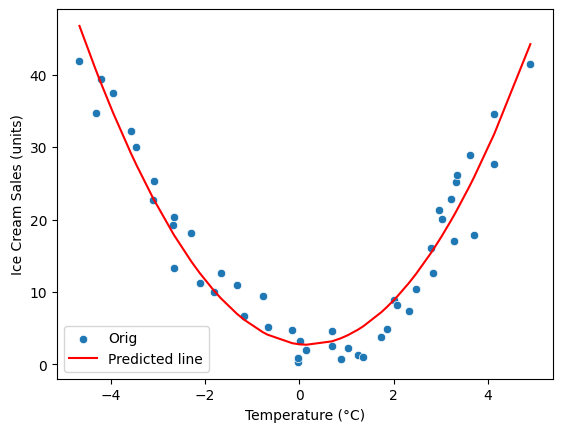

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=data,x="Temperature (°C)",y="Ice Cream Sales (units)")
sns.lineplot(x=data["Temperature (°C)"],y=y_pred,color="r")
plt.legend(["Orig","Predicted line"])
plt.show()